In [2]:
import pandas as pd
import scipy.io
import pywt
import glob
import matplotlib.pyplot as plt
import scaleogram as scg
from scaleogram import cws
import numpy as np
from math import *
import cv2

In [3]:
data_path = glob.glob('E:\LAB\ScaleMind\Data_ECG\*\*\*')
# print(type(data_path))
output_path = "E:\git\HeartResearch\Data set\Output"
data = ['E:\LAB\ScaleMind\Data_ECG\TrainingSet1\TrainingSet1\A0011.mat','E:\LAB\ScaleMind\Data_ECG\TrainingSet1\TrainingSet1\A0001.mat']
# mat = scipy.io.loadmat('E:\LAB\ScaleMind\Data_ECG\TrainingSet1\TrainingSet1\A0011.mat')
# x = mat.get("ECG")
# a = x[0][0]
# signal = a[2][0]

In [ ]:
for name in data:
    mat = scipy.io.loadmat(name)
    x = mat.get("ECG")
    a = x[0][0]
    signal = a[2]

AxesSubplot(0.125,0.11;0.775x0.77)


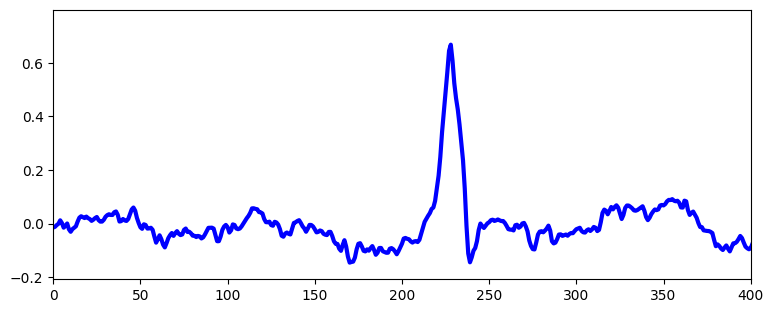

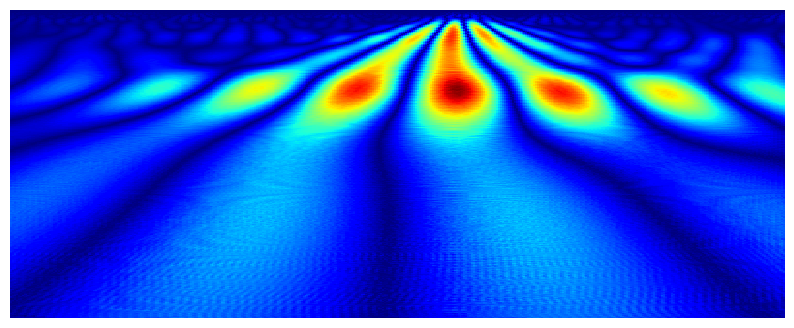

In [6]:
mat = scipy.io.loadmat('E:\LAB\ScaleMind\Data_ECG\TrainingSet3\TrainingSet3\A4472.mat')
x = mat.get("ECG")
a = x[0][0]
signal = a[2][0]

scg.set_default_wavelet('morl')

signal_length = 400
# range of scales to perform the transform
scales = scg.periods2scales(np.arange(1, signal_length+1))
x_values_wvt_arr = range(0,len(signal),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, signal, linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
# ax1.set_title("ECG")

# the scaleogram
fig = cws(signal[:signal_length], scales=scales, figsize=(10, 4.0), coi = False)
print(fig)
# cv2.imwrite(output_path, fig)
plt.axis('off')
plt.savefig(output_path, bbox_inches='tight', pad_inches = 0)   # save the figure to file
# plt.close(fig) 


In [ ]:
x = np.linspace(0, 1, num=2048)
# chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Signal: ")
ax.plot(signal)
plt.show()
    
data = signal
waveletname = 'haar'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(12,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

In [54]:
def haarFWT ( signal, level ):
    s = .5;                  # scaling -- try 1 or ( .5 ** .5 )
    h = [ 1/(sqrt(2)), 1/(sqrt(2)) ];           # lowpass filter
    g = [ 1/(sqrt(2)), - 1/(sqrt(2)) ];           # highpass filter        
    f = len ( h );           # length of the filter
    t = signal;              # 'workspace' array
    l = len ( t );           # length of the current signal
    y = [0] * l;             # initialise output
    t = t + [ 0, 0 ];        # padding for the workspace
    for i in range ( level ):
        y [ 0:l ] = [0] * l; # initialise the next level 
        l2 = l // 2;         # half approximation, half detail
        for j in range ( l2 ):            
            for k in range ( f ):                
                y [j]    += t [ 2*j + k ] * h [ k ] * s;
                y [j+l2] += t [ 2*j + k ] * g [ k ] * s;
        l = l2;              # continue with the approximation
        t [ 0:l ] = y [ 0:l ] ;
    return y

In [85]:
def Haar(signal, name):
  for i in range(11):
    s0 = signal[i].tolist();
    plt.figure(figsize=(10,5))
    plt.plot(haarFWT (s0, 1 ))
    plt.plot(haarFWT (s0, 2 ))
    plt.plot(haarFWT (s0, 3 ))
    plt.title(name + ' Lead' + str(i+1))